In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path="local_paths.env")
# Changing default dir
os.chdir(os.getenv("LOCAL_REPO_DIR"))

# Pandas options
pd.set_option("display.max_columns", 500)
# Plotting options
import warnings

warnings.filterwarnings("ignore")

# Exploring Data

In [2]:
data_dir = os.getenv("LOCAL_DATA_DIR")

In [3]:
data_dir

'/Volumes/DOCK-HD/Data/maize-crop-diagnose/'

Text(0.5, 1.0, 'Healthy :(480, 640)')

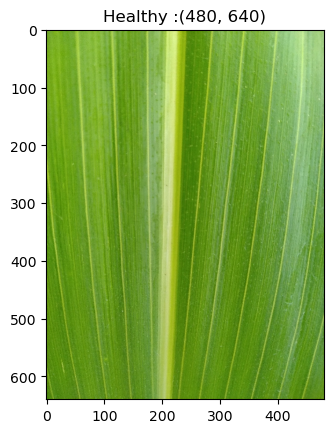

In [5]:
img = tf.keras.utils.load_img(f"{data_dir}/healthy/HEATHLY_1/Image_1.jpg")
plt.imshow(img)
plt.title(f"Healthy :{img.size}")

Text(0.5, 1.0, 'MLN: (480, 640)')

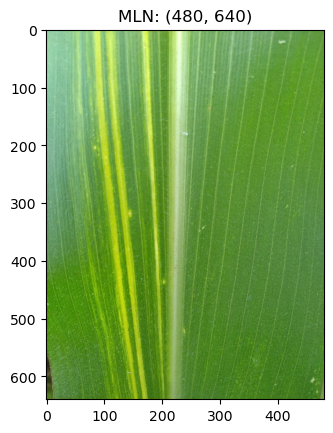

In [9]:
img = tf.keras.utils.load_img(f"{data_dir}/mln/MLN 1&2/Image_1.jpg")
plt.imshow(img)
plt.title(f"MLN: {img.size}")

Text(0.5, 1.0, 'MSV 1: (480, 640)')

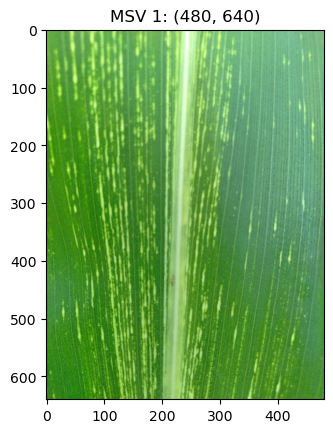

In [11]:
img = tf.keras.utils.load_img(f"{data_dir}/msv/MSV_1 edited/Image_1.jpg")
plt.imshow(img)
plt.title(f"MSV 1: {img.size}")

## Converting images to TF data

In [12]:
batch_size = 32
img_height = 64 * 2
img_width = 48 * 2

In [13]:
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="both",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 15349 files belonging to 3 classes.
Using 12280 files for training.
Using 3069 files for validation.
Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [14]:
class_names = train_ds.class_names
print(class_names)

['healthy', 'mln', 'msv']


2023-06-06 18:05:38.059068: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


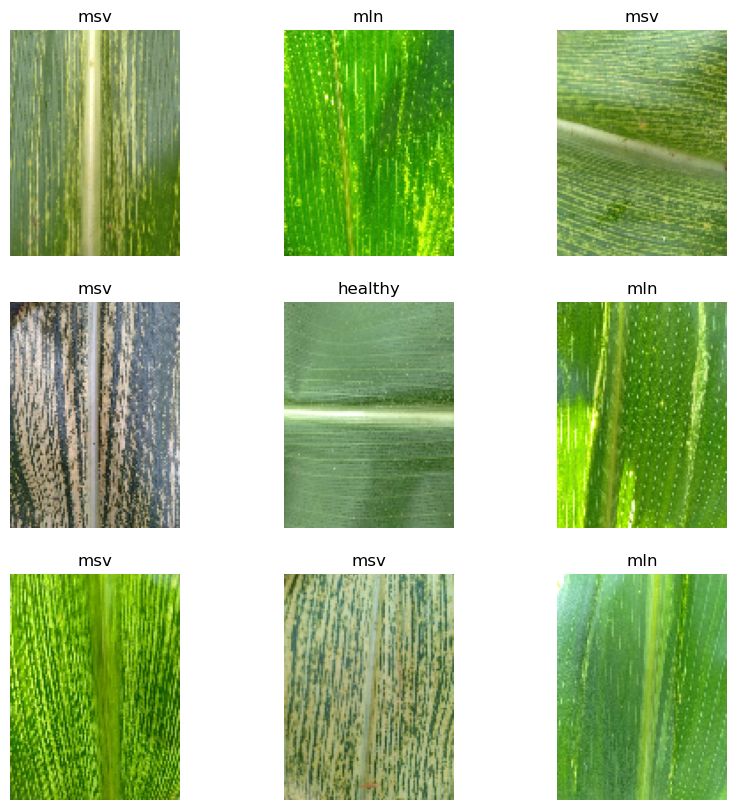

In [11]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")